# Temporal Clusters in the rainfall data
## Given the spatial distribution of rainfall over India is it possible tell when the data were observed?

### Step - 1: Prepare the data to feed spectral clustering

In [20]:
import numpy as np

# set random seed
np.random.seed(seed = 4200)

# import data
rain = np.load("../../data/rainfall/Rajeevan-1-degree-1901-2011-data-365-days.npy")

# pick a random year from the dataset
random_year = np.random.randint(111)
rain_ry = rain[random_year]
idx=np.where(rain_ry<0.01)
rain_ry[idx]=0.001


# create a function to compute running mean
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# compute the weekly average
num_days = 3
rain_ry_avg = np.zeros((rain_ry.shape[0], rain_ry.shape[1] - num_days + 1))
for loc in range(rain_ry.shape[0]):
    rain_ry_avg[loc] = running_mean(rain_ry[loc,:], num_days) 
rain_ry_avg=np.log(rain_ry_avg)

In [21]:
import matplotlib.pylab as plt
#plt.plot(rain_ry_avg,'.')

### Step - 2: Apply spectral clustering for (k = 2, 3, ..., 12)

In [27]:
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans

#clusters = []
#for k in range(2,3):
#clusters = SpectralClustering(n_clusters = 2,random_state=0).fit(rain_ry_avg.T)
#clusters = DBSCAN(eps = 50, min_samples = 100).fit(rain_ry_avg.T)
clusters=KMeans(n_clusters=2,init='k-means++',max_iter=1000,n_init=3,random_state=0).fit(rain_ry_avg.T)

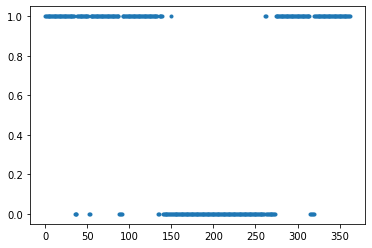

In [28]:
plt.plot(clusters.labels_,'.')

## Step - 3: Use elbow method to find the optimal number of clusters


### Step - 4: Can we tell if a certain day belonged to the monsoon period?